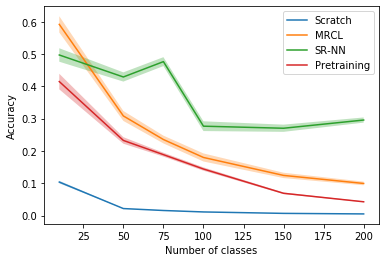

C:\Users\MIHAEL~1\Envs\MRCL-O~1\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\MIHAEL~1\Envs\MRCL-O~1\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


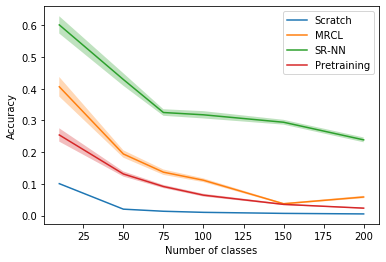

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import json 
import scipy.stats


def get_mean_and_std(filename, points, confidence=0.95):
    mean = []
    std = []
    for point in points:
        with open(f"{filename}_{point}.json", 'r') as f:
            results = json.load(f)

        n = len(results)
        results_np = np.array(results).astype(np.float)
        
        se = scipy.stats.sem(results_np)
        std_c = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
        
        mean.append(np.mean(results_np))  
        std.append(std_c)

    mean = np.array(mean)
    std = np.array(std)
    return mean, std


def plot_evaluation_results(methods, plot_name):
    for name, path in methods.items():
        scartch_train, scartch_train_std = get_mean_and_std(path, points)
        plt.plot(points, scartch_train, label=name)
        plt.fill_between(points, scartch_train-scartch_train_std, scartch_train+scartch_train_std, alpha = 0.3)
    plt.xlabel("Number of classes")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig(plot_name, bbox_inches='tight')
    plt.show()

points = [10, 50, 75 , 100, 150, 200]

methods_train = {"Scratch": "results/omniglot/scratch/mrcl_omniglot_training",
                 # "SR-NN": "results/omniglot/sr_nn/sr_nn_eval_train",
                 #"SR-NN-ALL": "results/omniglot/sr_nn/sr_nn_eval_train_all",
                 "MRCL": "results/omniglot/mrcl/mrcl_omniglot_training",
                 # "ORACLE": "results/omniglot/oracle/oracle_omniglot_training",
                 "SR-NN": "results/omniglot/sr_nn/beta_search/sr_nn_eval_train_0_01",
                "Pretraining": "results/omniglot/basic_pt/basic_pt_omniglot_training"} # ,
                 #"SR-NN-0.01": "results/omniglot/sr_nn/beta_search/sr_nn_eval_train_0_01",
                 #"SR-NN-0.5": "results/omniglot/sr_nn/beta_search/sr_nn_eval_train_0_5",
                 #"SR-NN-0.05": "results/omniglot/sr_nn/beta_search/sr_nn_eval_train_0_05",
                 #"SR-NN-0.005": "results/omniglot/sr_nn/beta_search/sr_nn_eval_train_0_005"}

methods_test = {"Scratch": "results/omniglot/scratch/mrcl_omniglot_testing",
                # "SR-NN": "results/omniglot/sr_nn/sr_nn_eval_test",
                #"SR-NN-ALL": "results/omniglot/sr_nn/sr_nn_eval_test_all",
                "MRCL": "results/omniglot/mrcl/mrcl_omniglot_testing",
                #"ORACLE": "results/omniglot/oracle/oracle_omniglot_testing",
                "SR-NN": "results/omniglot/sr_nn/beta_search/sr_nn_eval_test_0_1",
                "Pretraining": "results/omniglot/basic_pt/basic_pt_omniglot_testing"}# ,
                #"SR-NN-0.01": "results/omniglot/sr_nn/beta_search/sr_nn_eval_test_0_01",
                #"SR-NN-0.5": "results/omniglot/sr_nn/beta_search/sr_nn_eval_test_0_5",
                #"SR-NN-0.05": "results/omniglot/sr_nn/beta_search/sr_nn_eval_test_0_05",
                #"SR-NN-0.005": "results/omniglot/sr_nn/beta_search/sr_nn_eval_test_0_005"}

plot_evaluation_results(methods_train, "omniglot_training_accuracy.pdf")
plot_evaluation_results(methods_test, "omniglot_testing_accuracy.pdf")